In [17]:
import pandas as pd

In [14]:
import plotly.express as px
import plotly.graph_objects as go

In [6]:
population = pd.read_excel("D:\data set\population.xlsx")
population

NameError: name 'pd' is not defined

In [5]:
population.isna().sum()

Year                 0
Total                0
People_+/-           0
Growth_Rate          0
Life_Exp             0
IND_pop              0
IND_People_+/-       0
IND_Growth_Rate      0
IND_Life_Exp         0
CHINA_pop            0
CHINA_Growth_Rate    0
CHINA_People_+/-     0
CHINA_Life_Exp       0
dtype: int64

In [32]:
population.duplicated().sum()

0

In [25]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      218 non-null    object 
 1   Continent                    218 non-null    object 
 2   2022_pop                     218 non-null    int64  
 3   2020_pop                     218 non-null    int64  
 4   2015_pop                     218 non-null    int64  
 5   2010_pop                     218 non-null    int64  
 6   2000_pop                     218 non-null    int64  
 7   1990_pop                     218 non-null    int64  
 8   1980_pop                     218 non-null    int64  
 9   1970_pop                     218 non-null    int64  
 10  2023_pop                     218 non-null    int64  
 11  2023_Male                    218 non-null    int64  
 12  2023_Female                  218 non-null    int64  
 13  2023_Births         

In [2]:
num_rows, num_columns = population.shape
print(f"num of rows: {num_rows}")
print(f"num of columns: {num_columns}")


NameError: name 'population' is not defined

In [33]:
pop_mean = ['2023_pop', '2020_pop', '2010_pop', '2000_pop']
mean_values = population[pop_mean].mean()
print("mean values:")
print(mean_values)

mean values:
2023_pop    3.501178e+07
2020_pop    3.416783e+07
2010_pop    3.055078e+07
2000_pop    2.693427e+07
dtype: float64


# Population for Different Years by Countries

In [28]:
df = population[['Country', 'Continent', '2023_pop', '2020_pop', '2010_pop', '2000_pop']]
sorted_df = df.sort_values(by='2023_pop', ascending=False)
top_5 = sorted_df.head(10)
melted_top_5 = pd.melt(top_5, id_vars=['Country', 'Continent'], var_name='Years', value_name='Population')
sorted_melted_top_5 = melted_top_5.sort_values(by='Population', ascending=False)
fig = px.bar(sorted_melted_top_5, x='Country', y='Population', facet_col='Years',
            color='Continent', height=400, width=900)
fig.update_layout(title='Population for Different Years by Countries',
                 xaxis_title = 'Country',
                 yaxis_title = 'Population')
fig.show()

KeyError: "None of [Index(['Country', 'Continent', '2023_pop', '2020_pop', '2010_pop', '2000_pop'], dtype='object')] are in the [columns]"

# Population Heat Map

In [4]:
fig5 = go.Figure(go.Choropleth(
    locations=population['Country'],
    z=population['2023_pop'], 
    locationmode='country names',
    colorscale='Reds',
))

fig5.update_layout(
    title_text='Population Heat Map',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig5.show()


NameError: name 'go' is not defined

# Population by Gender in 2023

In [5]:
df1 = population[['Country', 'Continent', '2023_pop', '2023_Male', '2023_Female']]
sorted_df1 = df1.sort_values(by='2023_pop', ascending=False)
top_20 = sorted_df1.head(20)
melted_top_20 = pd.melt(top_20, id_vars=['Country', 'Continent'], var_name='Categories', value_name='Population')
sorted_melted_top_20 = melted_top_20.sort_values(by='Population', ascending=False)
fig2 = px.histogram(sorted_melted_top_20, x='Population', y='Categories', color='Continent',
                   title='Population by Gender in 2023')
fig2.show()

NameError: name 'population' is not defined

# The Growth Rate of all Countries

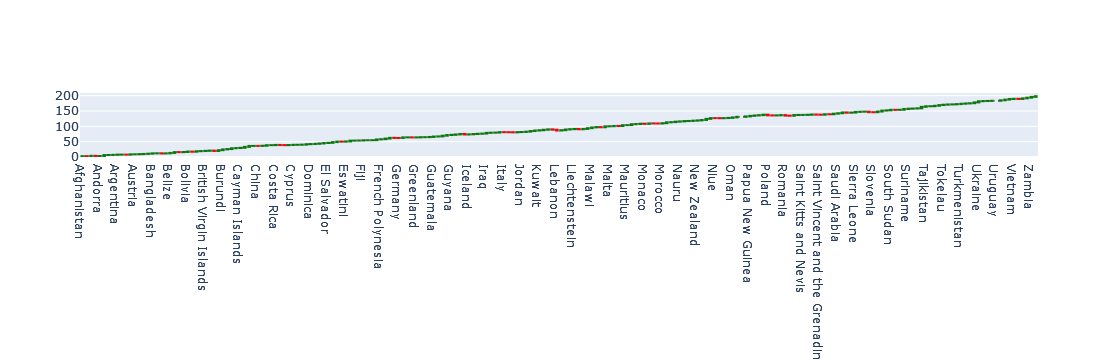

In [252]:
fig4 = go.Figure(go.Waterfall(
    name='2023_Growth_Rate',
    orientation='v',
    x=population['Country'],
   y=population['2023_Growth_Rate'],
    increasing={'marker': {'color': 'green'}},
    decreasing={'marker': {'color': 'red'}},
))
fig4.show()


# The Growth Rate of Top 20 Countries

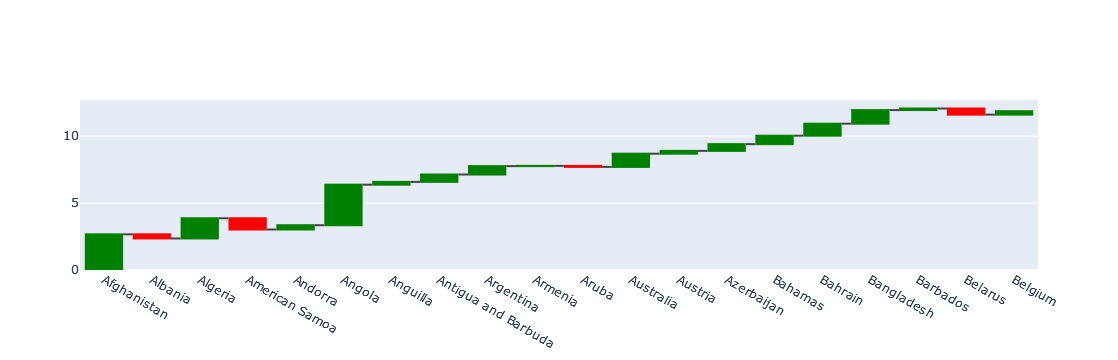

In [33]:
df2 = population[['Country', '2023_Growth_Rate']].head(20)
fig6 = go.Figure(go.Waterfall(
    name='2023_Growth_Rate',
    orientation='v',
    x=df2['Country'],
   y=df2['2023_Growth_Rate'],
    increasing={'marker': {'color': 'green'}},
    decreasing={'marker': {'color': 'red'}},
))

fig6.show()

# Deaths and Births in 2023

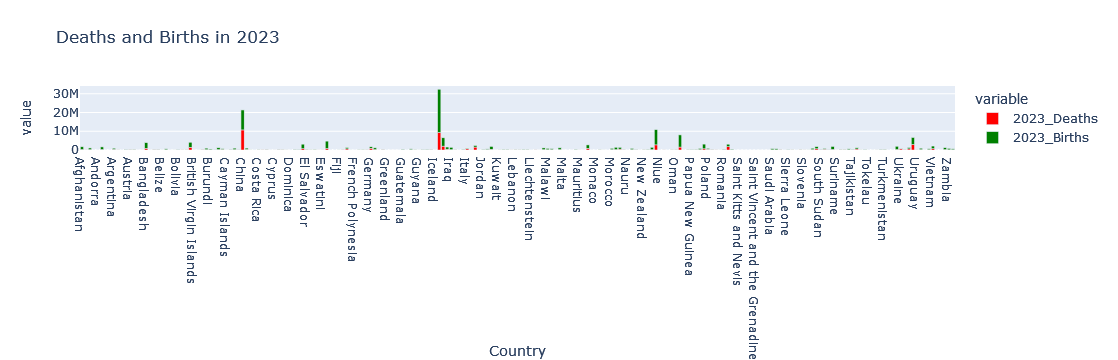

In [50]:
fig7 = px.bar(population, x='Country', y=['2023_Deaths', '2023_Births'],
             color_discrete_sequence=['red', 'green'],
             title='Deaths and Births in 2023'
             )

fig7.show()


# Deaths and Births in Top 10 Countries 

C:\Users\yelug\AppData\Local\Temp\ipykernel_29084\1546906195.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



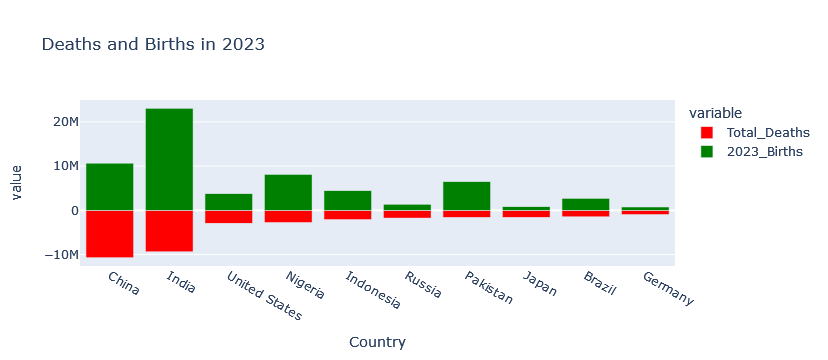

In [51]:
df3 = population[['Country', '2023_Births', '2023_Deaths', '2023_Male_Deaths', '2023_Female_Deaths']]
sorted_df3 = df3.sort_values(by='2023_Deaths', ascending=False)
top_10 = sorted_df3.head(10)
top_10['Total_Deaths'] = -(top_10['2023_Male_Deaths'] + top_10['2023_Female_Deaths'])
fig8 = px.bar(top_10, x='Country', y=['Total_Deaths', '2023_Births'],
             color_discrete_sequence=['red', 'green'],
             title='Deaths and Births in 2023'
             )

fig8.show()


# Percentage of Male & Female  Deaths in 2023

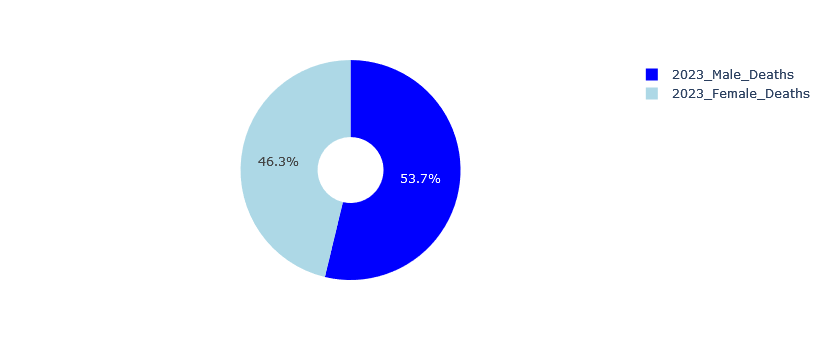

In [52]:
df4 = population[['2023_Male_Deaths', '2023_Female_Deaths']]
melted = pd.melt(df4, var_name='Gender', value_name='deaths')
fig9 = px.pie(melted, values='deaths', names = 'Gender', hole=0.3, color_discrete_sequence=['blue', 'lightblue'])
fig9.show()

# Comparision of Fertility_Rate and Mortality_Rate Among all Continents

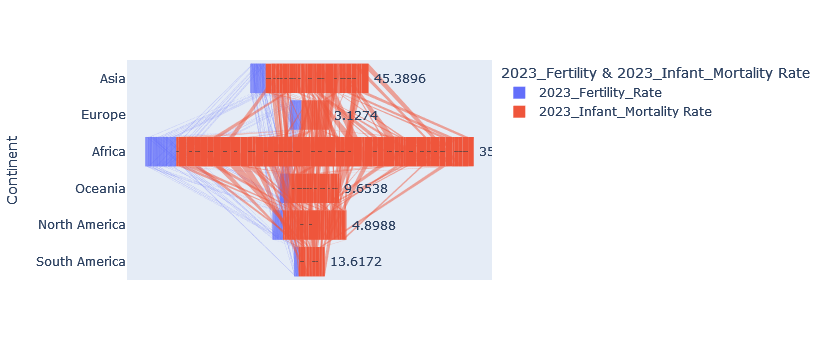

In [39]:
df9 = population[['Continent', '2023_Fertility_Rate', '2023_Infant_Mortality Rate']]
melted_df9 = pd.melt(df9, id_vars='Continent', var_name='2023_Fertility & 2023_Infant_Mortality Rate', value_name='values')
fig10 = px.funnel(melted_df9, x='values', y='Continent', color='2023_Fertility & 2023_Infant_Mortality Rate')
fig10.show()

In [41]:
countries = ['India', 'China', 'United States']
filtered_population = population[population['Country'].isin(countries)]
print(filtered_population)

           Country      Continent    2022_pop    2020_pop    2015_pop  \
40           China           Asia  1425887337  1424929781  1393715448   
89           India           Asia  1417173173  1396387127  1322866505   
207  United States  North America   338289857   335942003   324607776   

       2010_pop    2000_pop    1990_pop   1980_pop   1970_pop  ...  \
40   1348191368  1264099069  1153704252  982372466  822534450  ...   
89   1240613620  1059633675   870452165  696828385  557501301  ...   
207   311182845   282398554   248083732  223140018  200328340  ...   

     2023_Female  2023_Births  2023_Deaths  2023_Male_Deaths  \
40     698498544     10660034     10705689           5993726   
89     691776131     23056737      9368327           5079472   
207    171701230      3745361      2912402           1537175   

     2023_Female_Deaths  2023_Life_Expectancy  2023_Fertility_Rate  \
40              4711963               78.7888               1.1899   
89              4288855      

# India, China & USA Population Heat Map

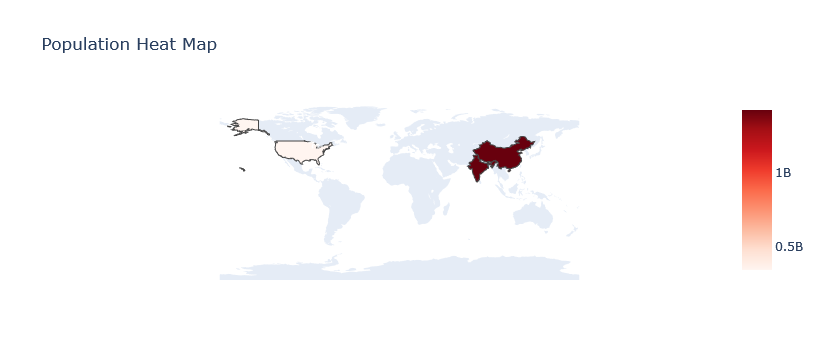

In [42]:
fig11 = go.Figure(go.Choropleth(
    locations=filtered_population['Country'],
    z=filtered_population['2023_pop'], 
    locationmode='country names',
    colorscale='Reds',
))

fig11.update_layout(
    title_text='Population Heat Map',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )

)

fig11.show()

# Population for Different Years by Countries

In [43]:
df5 = filtered_population[['Country', '2022_pop', '2023_pop']]
melted_df5 = pd.melt(df5, id_vars='Country', var_name='Years', value_name='Population')
fig12 = px.line(melted_df5, x='Years', y='Population', color='Country', markers=True)
fig12.update_layout(
xaxis_title = 'Year',
yaxis_title = 'Population')
fig12.show()

# Difference Between Male and Female Pop by Countries

In [44]:
df6 = filtered_population[['Country', '2023_Female', '2023_Male', '2023_pop']]
melted_df6 = pd.melt(df6, id_vars='Country', var_name='Gender', value_name='Population')
fig13 = px.sunburst(melted_df6,  path=['Country', 'Gender'], values='Population')
fig13.show()

In [45]:
df7 = filtered_population[['Country', '2023_Births', '2023_Deaths', '2023_Male_Deaths', '2023_Female_Deaths']]
melted_df7 = pd.melt(df7, id_vars='Country', var_name='Values', value_name='Birts&Deaths')
fig14 = px.line(melted_df7, x='Country', y='Birts&Deaths', color='Values', symbol='Values')
fig14.show()

In [46]:
fig15 = px.bar(filtered_population, x='2023_Life_Expectancy', y='Country', text='2023_Life_Expectancy')
fig15.show()

In [47]:
df8 = filtered_population[['Country', '2023_Fertility_Rate', '2023_Infant_Mortality Rate', '2023_Growth_Rate']]
melted_df8 = pd.melt(df8, id_vars='Country', var_name='Fertility, Mortality & 2023_Growth Rate', value_name='Values')
fig16 = px.line(melted_df8, x='Country', y='Values', color='Fertility, Mortality & 2023_Growth Rate', symbol='Fertility, Mortality & 2023_Growth Rate',
               text='Values')
fig16.show()

In [48]:
fig17 = px.funnel(filtered_population, x='2023_Growth_Rate', y='Country')
fig17.show()